## Preprocessing for the first dictionary defines work/job as a comprehensive entity

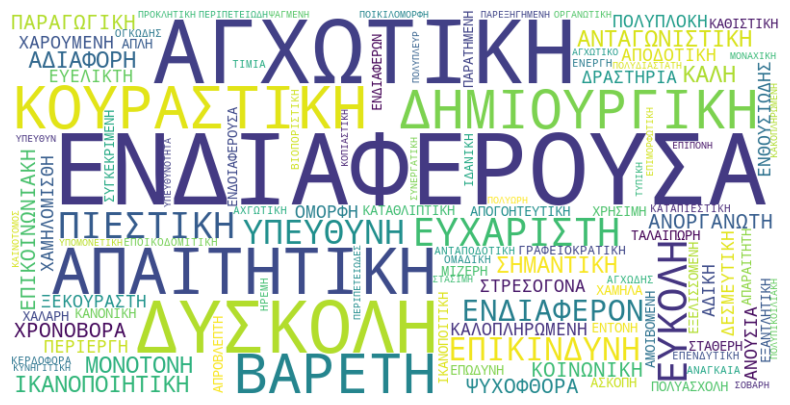

Συχνότητα εμφάνισης κάθε λέξης (ταξινομημένα):
ΕΝΔΙΑΦΕΡΟΥΣΑ: 95
ΑΓΧΩΤΙΚΗ: 74
ΔΥΣΚΟΛΗ: 47
ΑΠΑΙΤΗΤΙΚΗ: 37
ΚΟΥΡΑΣΤΙΚΗ: 32
ΒΑΡΕΤΗ: 28
ΔΗΜΙΟΥΡΓΙΚΗ: 26
ΕΥΚΟΛΗ: 13
ΕΥΧΑΡΙΣΤΗ: 12
ΠΙΕΣΤΙΚΗ: 11
ΥΠΕΥΘΥΝΗ: 9
ΕΠΙΚΙΝΔΥΝΗ: 8
ΕΝΔΙΑΦΕΡΟΝ: 7
ΚΑΛΗ: 4
ΣΗΜΑΝΤΙΚΗ: 4
ΑΝΤΑΓΩΝΙΣΤΙΚΗ: 4
ΑΔΙΑΦΟΡΗ: 4
ΜΟΝΟΤΟΝΗ: 4
ΙΚΑΝΟΠΟΙΗΤΙΚΗ: 4
ΚΟΙΝΩΝΙΚΗ: 3
ΑΝΟΡΓΑΝΩΤΗ: 3
ΧΡΟΝΟΒΟΡΑ: 3
ΨΥΧΟΦΘΟΡΑ: 3
ΠΑΡΑΓΩΓΙΚΗ: 3
ΕΠΙΚΟΙΝΩΝΙΑΚΗ: 3
ΑΔΙΚΗ: 2
ΧΑΜΗΛΟΜΙΣΘΗ: 2
ΚΑΛΟΠΛΗΡΩΜΕΝΗ: 2
ΔΕΣΜΕΥΤΙΚΗ: 2
ΑΝΟΥΣΙΑ: 2
ΣΤΡΕΣΟΓΟΝΑ: 2
ΕΥΕΛΙΚΤΗ: 2
ΧΑΡΟΥΜΕΝΗ: 2
ΕΝΘΟΥΣΙΩΔΗΣ: 2
ΠΕΡΙΕΡΓΗ: 2
ΔΡΑΣΤΗΡΙΑ: 2
ΟΜΟΡΦΗ: 2
ΠΟΛΥΠΛΟΚΗ: 2
ΞΕΚΟΥΡΑΣΤΗ: 2
ΑΠΟΔΟΤΙΚΗ: 2
ΑΠΟΓΟΗΤΕΥΤΙΚΗ: 1
ΠΟΛΥΑΣΧΟΛΗ: 1
ΣΤΑΘΕΡΗ: 1
ΕΝΤΟΝΗ: 1
ΚΑΘΙΣΤΙΚΗ: 1
ΧΑΛΑΡΗ: 1
ΧΡΗΣΙΜΗ: 1
ΑΣΚΟΠΗ: 1
ΤΑΛΑΙΠΩΡΗ: 1
ΕΠΩΔΥΝΗ: 1
ΜΙΖΕΡΗ: 1
ΚΑΤΑΘΛΙΠΤΙΚΗ: 1
ΕΞΑΝΤΛΗΤΙΚΗ: 1
ΧΑΜΗΛΑ: 1
ΑΜΟΙΒΟΜΕΝΗ: 1
ΣΥΓΚΕΚΡΙΜΕΝΗ: 1
ΚΑΝΟΝΙΚΗ: 1
ΕΝΔΙΑΦΕΡΩΝ: 1
ΑΠΛΗ: 1
ΙΚΑΝΟΠΟΙΤΙΚΗ: 1
ΕΝΔΟΙΑΦΕΡΟΥΣΑ: 1
ΕΞΕΛΙΣΣΟΜΕΝΗ: 1
ΑΠΑΡΑΙΤΗΤΗ: 1
ΑΠΡΟΒΛΕΠΤΗ: 1
ΠΑΡΑΤΗΜΕΝΗ: 1
ΓΡΑΦΕΙΟΚΡΑΤΙΚΗ: 1
ΙΔΑΝΙΚΗ: 1
ΕΠΟΙΚΟΔΟΜΙΤΙΚΗ: 1
ΚΑΤΑΠΙΕΣΤΙΚΗ: 1
ΑΝΤΑΠΟΔΟΤΙΚΗ: 1
ΚΕΡΔΟΦΟΡΑ: 1


In [3]:
import re
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize Greek stopwords
stop_words = set(stopwords.words('greek'))

# Function to load suffixes from a text file
def load_suffixes(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

# Function to load tones from a text file
def load_tones(file_path):
    tones = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            original, normalized = line.strip().split(',')
            tones[original] = normalized
    return tones

# Load suffixes and tones from files
suffixes = load_suffixes(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\suffixes.txt')
tones = load_tones(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\tones.txt')

def remove_tones(text):
    for accented, unaccented in tones.items():
        text = text.replace(accented, unaccented)
    return text

def remove_stopwords(text):
    return ' '.join([word for word in text.lower().split() if word not in stop_words])

def remove_suffixes(word, suffixes):
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]  # Remove the suffix
            break  # Remove only the first matching suffix
    return word

def clean_text(text):
    if text is None:
        return ''
    
    text = remove_tones(text)
    text = text.upper()
    
    # Αφαίρεση URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Αφαίρεση @mentions
    text = re.sub(r'@\w+', '', text)

    # Αφαίρεση hashtags
    text = re.sub(r'#\w+', '', text)

    # Αφαίρεση σημεία στίξης εκτός από κενά
    text = re.sub(r'[^\w\sΑ-Ω]', '', text)
    
    # Αφαίρεση περιττών κενών
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Διαδρομή αρχείου εισόδου
input_file = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoW1.txt'

# Διαβάζουμε το αρχείο εισόδου
with open(input_file, 'r', encoding='utf-8') as file:
    words = file.read().splitlines()

# Αφαίρεση suffixes από τις λέξεις
cleaned_texts = [remove_suffixes(word, suffixes) for word in words]

# Καθαρισμός κειμένου
cleaned_texts = [clean_text(word) for word in cleaned_texts]

# Δημιουργία Bag of Words (Counter)
bow = Counter(' '.join(cleaned_texts).split())

# Ταξινόμηση των λέξεων αλφαβητικά
sorted_words = sorted(bow)

# Διαδρομή αρχείου εξόδου
output_file = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoW2.txt'

# Αποθήκευση των λέξεων στο νέο αρχείο
with open(output_file, 'w', encoding='utf-8') as file:
    for word in sorted_words:
        file.write(word + '\n')

# Δημιουργία σύννεφου λέξεων
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bow)

# Εμφάνιση του σύννεφου λέξεων
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Αφαίρεση άξονα
plt.show()

# Εμφάνιση της συχνότητας κάθε λέξης ταξινομημένα
print("Συχνότητα εμφάνισης κάθε λέξης (ταξινομημένα):")
for word, freq in bow.most_common():
    print(f"{word}: {freq}")


## HERE IT COUNTS THE WORDS AFTER REMOVING SUFFIXES

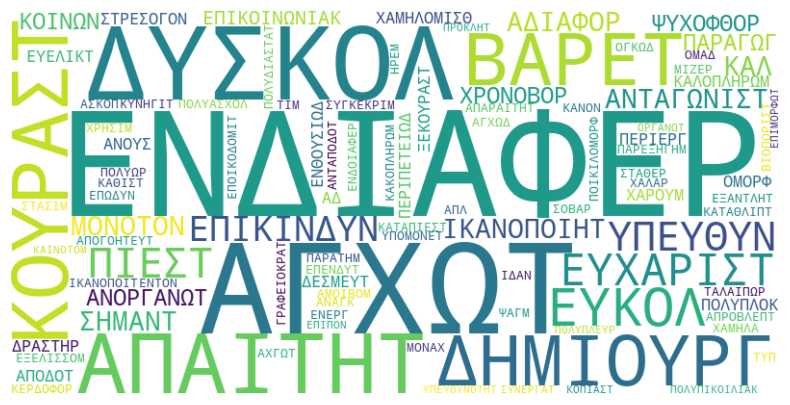

Frequency of each word (sorted):
ΕΝΔΙΑΦΕΡ: 103
ΑΓΧΩΤ: 75
ΔΥΣΚΟΛ: 47
ΑΠΑΙΤΗΤ: 37
ΚΟΥΡΑΣΤ: 32
ΒΑΡΕΤ: 28
ΔΗΜΙΟΥΡΓ: 26
ΕΥΚΟΛ: 13
ΕΥΧΑΡΙΣΤ: 12
ΠΙΕΣΤ: 11
ΥΠΕΥΘΥΝ: 10
ΕΠΙΚΙΝΔΥΝ: 8
ΚΑΛ: 4
ΣΗΜΑΝΤ: 4
ΑΝΤΑΓΩΝΙΣΤ: 4
ΑΔΙΑΦΟΡ: 4
ΜΟΝΟΤΟΝ: 4
ΙΚΑΝΟΠΟΙΗΤ: 4
ΚΟΙΝΩΝ: 3
ΑΝΟΡΓΑΝΩΤ: 3
ΧΡΟΝΟΒΟΡ: 3
ΨΥΧΟΦΘΟΡ: 3
ΠΑΡΑΓΩΓ: 3
ΕΠΙΚΟΙΝΩΝΙΑΚ: 3
ΑΔ: 2
ΧΑΜΗΛΟΜΙΣΘ: 2
ΚΑΛΟΠΛΗΡΩΜ: 2
ΔΕΣΜΕΥΤ: 2
ΑΝΟΥΣ: 2
ΣΤΡΕΣΟΓΟΝ: 2
ΕΥΕΛΙΚΤ: 2
ΧΑΡΟΥΜ: 2
ΕΝΘΟΥΣΙΩΔ: 2
ΠΕΡΙΕΡΓ: 2
ΔΡΑΣΤΗΡ: 2
ΟΜΟΡΦ: 2
ΠΟΛΥΠΛΟΚ: 2
ΞΕΚΟΥΡΑΣΤ: 2
ΑΠΟΔΟΤ: 2
ΠΕΡΙΠΕΤΕΙΩΔ: 2
ΑΠΟΓΟΗΤΕΥΤ: 1
ΠΟΛΥΑΣΧΟΛ: 1
ΣΤΑΘΕΡ: 1
ΕΝΤΟΝ: 1
ΚΑΘΙΣΤ: 1
ΧΑΛΑΡ: 1
ΧΡΗΣΙΜ: 1
ΑΣΚΟΠ: 1
ΤΑΛΑΙΠΩΡ: 1
ΕΠΩΔΥΝ: 1
ΜΙΖΕΡ: 1
ΚΑΤΑΘΛΙΠΤ: 1
ΕΞΑΝΤΛΗΤ: 1
ΧΑΜΗΛΑ: 1
ΑΜΟΙΒΟΜ: 1
ΣΥΓΚΕΚΡΙΜ: 1
ΚΑΝΟΝ: 1
ΑΠΛ: 1
ΙΚΑΝΟΠΟΙΤ: 1
ΕΝΔΟΙΑΦΕΡ: 1
ΕΞΕΛΙΣΣΟΜ: 1
ΑΠΑΡΑΙΤΗΤ: 1
ΑΠΡΟΒΛΕΠΤ: 1
ΠΑΡΑΤΗΜ: 1
ΓΡΑΦΕΙΟΚΡΑΤ: 1
ΙΔΑΝ: 1
ΕΠΟΙΚΟΔΟΜΙΤ: 1
ΚΑΤΑΠΙΕΣΤ: 1
ΑΝΤΑΠΟΔΟΤ: 1
ΚΕΡΔΟΦΟΡ: 1
ΕΝΕΡΓ: 1
ΤΙΜ: 1
ΕΠΕΝΔΥΤ: 1
ΑΝΑΓΚ: 1
ΟΓΚΩΔ: 1
ΗΡΕΜ: 1
ΑΓΧΩΔ: 1
ΒΙΟΠΟΡΙΣΤ: 1
ΟΜΑΔ: 1
ΑΧΓΩΤ: 1
ΠΑΡΕΞΗΓΗΜ: 1
ΠΟΙΚΙΛΟΜΟΡΦ: 1
ΨΑΓΜ: 1
ΚΥΝΗΓΙΤ: 1
ΠΟΛΥΔΙΑΣΤΑΤ: 1
ΣΟΒΑΡ: 1

In [5]:
import re
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize Greek stopwords
stop_words = set(stopwords.words('greek'))

# Function to load suffixes from a text file
def load_suffixes(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

# Function to load tones from a text file
def load_tones(file_path):
    tones = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            original, normalized = line.strip().split(',')
            tones[original] = normalized
    return tones

# Load suffixes and tones from files
suffixes = load_suffixes(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\suffixes.txt')
tones = load_tones(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\tones.txt')

def remove_tones(text):
    for accented, unaccented in tones.items():
        text = text.replace(accented, unaccented)
    return text

def remove_stopwords(text):
    return ' '.join([word for word in text.lower().split() if word not in stop_words])
    
def remove_suffixes(word, suffixes):
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]  # Remove the suffix
            break  # Remove only the first matching suffix
    return word

def clean_text(text):
    if text is None:
        return ''
    
    text = remove_tones(text)
    text = remove_stopwords(text)
    text = text.upper()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove punctuation except spaces
    text = re.sub(r'[^\w\sΑ-Ω]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Input file path
input_file = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoW1.txt'

# Read the input file
with open(input_file, 'r', encoding='utf-8') as file:
    words = file.read().splitlines()

# Clean text (remove tones, stopwords, punctuation) 
cleaned_texts = [clean_text(word) for word in words]

# Remove suffixes
cleaned_texts_no_suffixes = [remove_suffixes(word, suffixes) for word in cleaned_texts]  # Remove suffixes

# Merge all cleaned words
all_cleaned_text = ' '.join(cleaned_texts_no_suffixes)

# Create Bag of Words (Counter)
bow = Counter(all_cleaned_text.split())

# Sort words alphabetically
sorted_words = sorted(bow)

# Output file path
output_file = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoW3.txt'

# Save the words to the new file
with open(output_file, 'w', encoding='utf-8') as file:
    for word in sorted_words:
        file.write(word + '\n')

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bow)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

# Display the frequency of each word sorted
print("Frequency of each word (sorted):")
for word, freq in bow.most_common():
    print(f"{word}: {freq}")


In [6]:
import re
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize Greek stopwords
stop_words = set(stopwords.words('greek'))

# Function to load suffixes from a text file
def load_suffixes(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

# Function to load tones from a text file
def load_tones(file_path):
    tones = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            original, normalized = line.strip().split(',')
            tones[original] = normalized
    return tones

# Load suffixes and tones from files
suffixes = load_suffixes(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\suffixes.txt')
tones = load_tones(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\tones.txt')

def remove_tones(text):
    for accented, unaccented in tones.items():
        text = text.replace(accented, unaccented)
    return text

def remove_stopwords(text):
    return ' '.join([word for word in text.lower().split() if word not in stop_words])
    
def remove_suffixes(word, suffixes):
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]  # Remove the suffix
            break  # Remove only the first matching suffix
    return word

def clean_text(text):
    if text is None:
        return ''
    
    text = remove_tones(text)
    text = remove_stopwords(text)
    text = text.upper()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove punctuation except for spaces
    text = re.sub(r'[^\w\sΑ-Ω]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Input file path
input_file = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoW1.txt'

# Read the input file
with open(input_file, 'r', encoding='utf-8') as file:
    words = file.read().splitlines()

# Clean the text (remove tones, stopwords, punctuation)
cleaned_texts = [clean_text(word) for word in words]

# Remove suffixes
cleaned_texts_no_suffixes = [remove_suffixes(word, suffixes) for word in cleaned_texts]  # Remove suffixes

# Save cleaned words to a new file (DoW4) without duplicates
output_file_cleaned = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoW4.txt'

with open(output_file_cleaned, 'w', encoding='utf-8') as file:
    for word in cleaned_texts_no_suffixes:
        file.write(word + '\n')

# Merge all cleaned words
all_cleaned_text = ' '.join(cleaned_texts_no_suffixes)




In [7]:
import re
from nltk.corpus import stopwords

# Initialize Greek stopwords
stop_words = set(stopwords.words('greek'))

# Function to load sentiment dictionary (word, score)
def load_sentiment_dict(file_path):
    sentiment_dict = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) == 2:
                word, score = parts
                sentiment_dict[word] = float(score)
    return sentiment_dict

# Load sentiment dictionary
sentiment_dict = load_sentiment_dict(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoW.txt')

# Function to load all words from DoW4.txt
def load_all_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read().splitlines()  # Read all lines as a list

# Function to calculate sentiment score and percentages
def calculate_sentiment(words, sentiment_dict):
    score = 0
    positive_count = 0
    negative_count = 0
    neutral_count = 0  # Initialize neutral count
    
    for word in words:
        word_cleaned = word.strip()  # Clean the word by stripping whitespace
        if word_cleaned in sentiment_dict:
            sentiment_value = sentiment_dict[word_cleaned]
            score += sentiment_value
            
            if sentiment_value > 0:
                positive_count += 1
            elif sentiment_value < 0:
                negative_count += 1
            else:
                neutral_count += 1  # Increment neutral count when sentiment_value == 0
    
    total_count = positive_count + negative_count + neutral_count  # Include neutral words in total count
    average_polarity = score / total_count if total_count > 0 else 0  # Avoid division by zero
    positive_percentage = (positive_count / total_count * 100) if total_count > 0 else 0
    negative_percentage = (negative_count / total_count * 100) if total_count > 0 else 0
    neutral_percentage = (neutral_count / total_count * 100) if total_count > 0 else 0  # Calculate neutral percentage

    # Print the total count, positive words count, negative words count, and neutral words count
    print(f"Total Count of Sentiment Words: {total_count}")
    print(f"Number of Positive Words: {positive_count}")
    print(f"Number of Negative Words: {negative_count}")
    print(f"Number of Neutral Words: {neutral_count}")
    
    return score, average_polarity, positive_percentage, negative_percentage, neutral_percentage

# Load all cleaned words from DoW4.txt (no need for further preprocessing)
words_from_file = load_all_words(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoW4.txt')

# Calculate sentiment score and percentages
sentiment_score, average_polarity, positive_percentage, negative_percentage, neutral_percentage = calculate_sentiment(words_from_file, sentiment_dict)

# Output results
print(f"Average Polarity for DoW4: {average_polarity:.2f}")
print(f"Total sentiment score for DoW4: {sentiment_score}")
print(f"Percentage of Positive Words: {positive_percentage:.2f}%")
print(f"Percentage of Negative Words: {negative_percentage:.2f}%")
print(f"Percentage of Neutral Words: {neutral_percentage:.2f}%")


Total Count of Sentiment Words: 536
Number of Positive Words: 239
Number of Negative Words: 297
Number of Neutral Words: 0
Average Polarity for DoW4: -0.04
Total sentiment score for DoW4: -19.429999999999886
Percentage of Positive Words: 44.59%
Percentage of Negative Words: 55.41%
Percentage of Neutral Words: 0.00%


## Preprocessing for the second dictionary based on working environment

In [9]:
import os

# Function to load suffixes from a text file
def load_suffixes(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

# Function to load tones from a text file
def load_tones(file_path):
    tones = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            original, normalized = line.strip().split(',')
            tones[original] = normalized
    return tones

# Load suffixes and tones from files
suffixes = load_suffixes(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\suffixes.txt')
tones = load_tones(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\tones.txt')

def remove_tones(text):
    for accented, unaccented in tones.items():
        text = text.replace(accented, unaccented)
    return text

def remove_suffixes(word):
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]  # Remove the suffix
            break  # Remove only the first matching suffix
    return word

def clean_text(text):
    if text is None:
        return ''
    
    text = remove_tones(text)
    words = [remove_suffixes(word) for word in text.split()]
    words = list(set(words))  # Remove duplicates
    words.sort(key=lambda x: x.lower())  # Sort words alphabetically (case insensitive)
    return ' '.join(words).upper()

# Διαδρομή του αρχείου εισόδου και εξόδου
input_file_path = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoWE_preprocess.txt'
output_file_path = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoWE_preprocess2.txt'

# Διαβάστε το αρχείο εισόδου
with open(input_file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Επεξεργασία των γραμμών
processed_lines = [clean_text(line.strip()) for line in lines]

# Αποθήκευση στο αρχείο εξόδου
with open(output_file_path, 'w', encoding='utf-8') as file:
    for processed_line in processed_lines:
        file.write(processed_line + '\n')



## Preprocessing for the third dictionary based on working environment

In [11]:
import os

# Function to load suffixes from a text file
def load_suffixes(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

# Function to load tones from a text file
def load_tones(file_path):
    tones = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            original, normalized = line.strip().split(',')
            tones[original] = normalized
    return tones

# Load suffixes and tones from files
suffixes = load_suffixes(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\suffixes.txt')
tones = load_tones(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\tones.txt')

def remove_tones(text):
    for accented, unaccented in tones.items():
        text = text.replace(accented, unaccented)
    return text

def remove_suffixes(word):
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]  # Remove the suffix
            break  # Remove only the first matching suffix
    return word

def clean_text(text):
    if text is None:
        return ''
    
    text = remove_tones(text)
    words = [remove_suffixes(word) for word in text.split()]
    words = list(set(words))  # Remove duplicates
    words.sort(key=lambda x: x.lower())  # Sort words alphabetically (case insensitive)
    return ' '.join(words).upper()

# Διαδρομή του αρχείου εισόδου και εξόδου
input_file_path = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoS_preprocess.txt'
output_file_path = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoS_preprocess2.txt'

# Διαβάστε το αρχείο εισόδου
with open(input_file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Επεξεργασία των γραμμών
processed_lines = [clean_text(line.strip()) for line in lines]

# Αποθήκευση στο αρχείο εξόδου
with open(output_file_path, 'w', encoding='utf-8') as file:
    for processed_line in processed_lines:
        file.write(processed_line + '\n')



## Preprocessing for the fourth dictionary based on working environment

In [13]:
import os

# Function to load suffixes from a text file
def load_suffixes(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

# Function to load tones from a text file
def load_tones(file_path):
    tones = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            original, normalized = line.strip().split(',')
            tones[original] = normalized
    return tones

# Load suffixes and tones from files
suffixes = load_suffixes(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\suffixes.txt')
tones = load_tones(r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\tones.txt')

def remove_tones(text):
    for accented, unaccented in tones.items():
        text = text.replace(accented, unaccented)
    return text

def remove_suffixes(word):
    for suffix in suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]  # Remove the suffix
            break  # Remove only the first matching suffix
    return word

def clean_text(text):
    if text is None:
        return ''
    
    text = remove_tones(text)
    words = [remove_suffixes(word) for word in text.split()]
    words = list(set(words))  # Remove duplicates
    words.sort(key=lambda x: x.lower())  # Sort words alphabetically (case insensitive)
    return ' '.join(words).upper()

# Διαδρομή του αρχείου εισόδου και εξόδου
input_file_path = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoSP_preprocess.txt'
output_file_path = r'C:\Users\Χρήστος\Desktop\Master Thesis\sentiment analysis-PYTHON\.ipynb_checkpoints\dictionary_creation\DoSP_preprocess2.txt'

# Διαβάστε το αρχείο εισόδου
with open(input_file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Επεξεργασία των γραμμών
processed_lines = [clean_text(line.strip()) for line in lines]

# Αποθήκευση στο αρχείο εξόδου
with open(output_file_path, 'w', encoding='utf-8') as file:
    for processed_line in processed_lines:
        file.write(processed_line + '\n')

